<a href="https://colab.research.google.com/github/harshalzate/DL/blob/main/batch_norm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

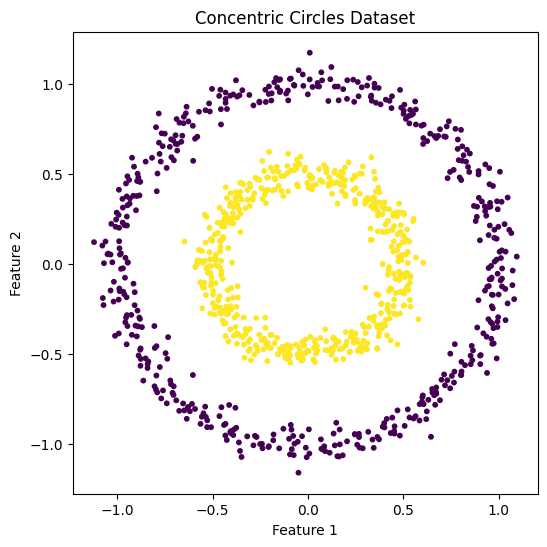

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# X contains the data points (features), y contains the labels (0 or 1)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/harshalzate/DL/refs/heads/main/Data_Files/concertriccir2.csv',header=None,names=['X', 'Y','class'])

In [18]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


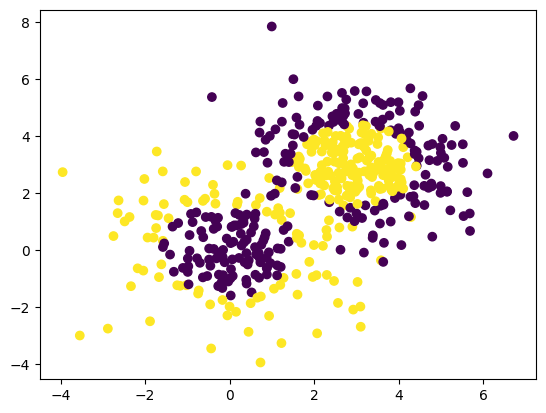

In [19]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [20]:

X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [22]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4777 - loss: 0.9601 - val_accuracy: 0.5700 - val_loss: 0.9338
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4817 - loss: 0.8816 - val_accuracy: 0.5700 - val_loss: 0.8579
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 0.8926 - val_accuracy: 0.5700 - val_loss: 0.7952
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4071 - loss: 0.8203 - val_accuracy: 0.5700 - val_loss: 0.7507
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4446 - loss: 0.7596 - val_accuracy: 0.5700 - val_loss: 0.7188
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4331 - loss: 0.7290 - val_accuracy: 0.5700 - val_loss: 0.6953
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3760 - loss: 0.7331 - val_accuracy: 0.5600 - val_loss: 0.6885
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4241 - loss: 0.7188 - val_accuracy: 0.5600 - 

In [25]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 33ms/step - loss: 0.6992 - accuracy: 0.4150 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.4325 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 3/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6882 - accuracy: 0.4250 - val_loss: 0.6823 - val_accuracy: 0.4700
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.4325 - val_loss: 0.6820 - val_accuracy: 0.4500
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6831 - accuracy: 0.4575 - val_loss: 0.6818 - val_accuracy: 0.4200
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.4475 - val_loss: 0.6815 - val_accuracy: 0.4100
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6822 - accuracy: 0.4600 - val_loss: 0.6810 - val_accuracy: 0.4100
Epoch 8/200


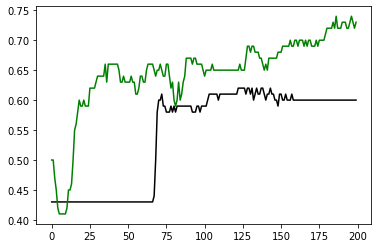

In [ ]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')